## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
df = pd.read_csv('tips.csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
numerical_columns = df.select_dtypes(exclude='O').columns.to_list()
numerical_columns

['total_bill', 'tip', 'size']

In [4]:
categorical_columns =df.select_dtypes(include='O').columns.to_list()
categorical_columns

['sex', 'smoker', 'day', 'time']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
# We can also derive info about categorical and numerical columns as below:

In [7]:
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.shape

(244, 3)

In [8]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.shape

(244, 4)

### 2. Compute the average bill amount for each day.

In [9]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [ ]:
# If we want to derive answer in single line, use below code: Males are more generous in giving tips

In [10]:
df.groupby('sex')['tip'].mean().idxmax()

'Male'

In [ ]:
#Other ways of checking are below:

In [11]:
df.groupby('sex')['tip'].sum().round(2)

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [ ]:
# Males are more generous in giving tips as they have 485.07 as tip sum.

### 4. According to the data, were there more customers for dinner or lunch?

In [ ]:
#We can derive answer in single line as below: more customers were there for Dinner

In [12]:
df.groupby('time')['size'].count().idxmax()

'Dinner'

In [ ]:
#Other ways to do this are:

In [13]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

In [14]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [ ]:
#We can infer from above that more customers were there for Dinner 

### 5. Based on the statistical summary, comment on the variable 'tip'

In [10]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Conclusion:There are some outliers in the tip 

### 6. Find the busiest day in terms of the orders?

In [11]:
df.day.value_counts().idxmax()

'Sat'

In [ ]:
#We can also check the mode of day using below to check day with highest frequency:

In [12]:
df.day.mode()

0    Sat
Name: day, dtype: object

In [ ]:
# Saturday is busiest day in terms of orders.

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [13]:
df['total_bill'].skew()

1.1332130376158205

In [ ]:
#below distribution plot shows the skewness and we can observe that the total_bill data is postively skewed.

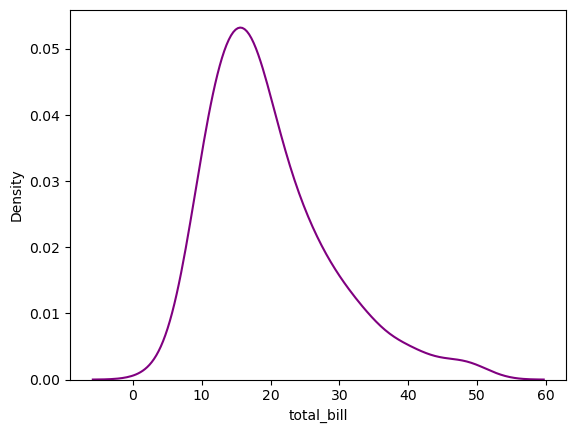

In [14]:
sns.distplot(df['total_bill'],hist=False, color='purple')
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [15]:
df[['tip','total_bill']].corr()


,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


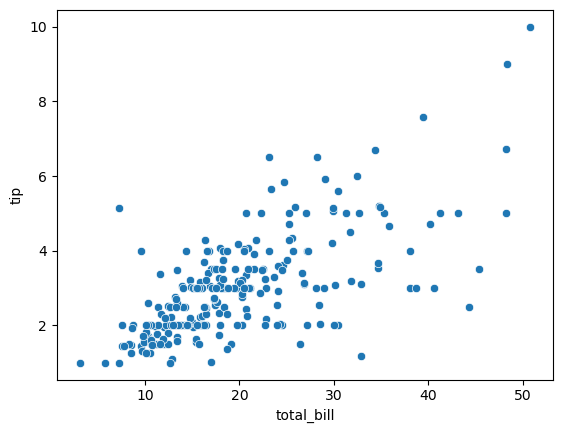

In [16]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

In [ ]:
# The tip amount is dependent on total_bill and tip increases with the increase in total_bill. There is some positive correlation between total_bill and tip

In [ ]:
#We can also use heatmap 

<AxesSubplot:>

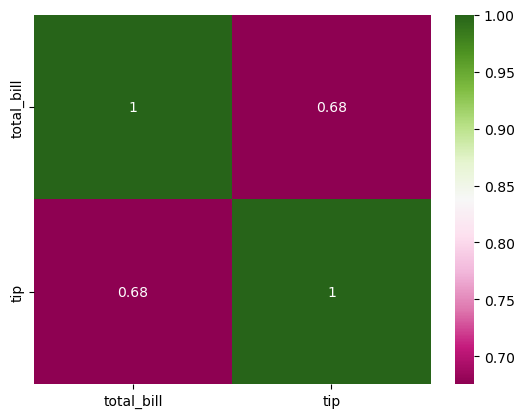

In [17]:
sns.heatmap(df[['total_bill', 'tip']].corr(), annot=True, cmap='PiYG')

In [ ]:
# The tip amount is dependent on total_bill and tip increases with the increase in total_bill. There is some positive correlation between total_bill and tip

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [ ]:
#We have 64.3% males and 35.6% females 

In [18]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

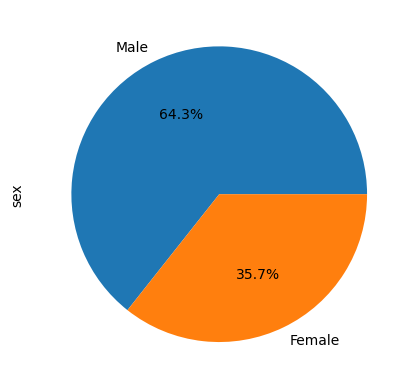

In [19]:
df['sex'].value_counts(normalize=True).plot( autopct='%1.1f%%',kind = 'pie')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [20]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

In [ ]:
#For counts Females: 54 non-smokers, 33 smokers. For Males: 97 non smokers, 60 smokers.

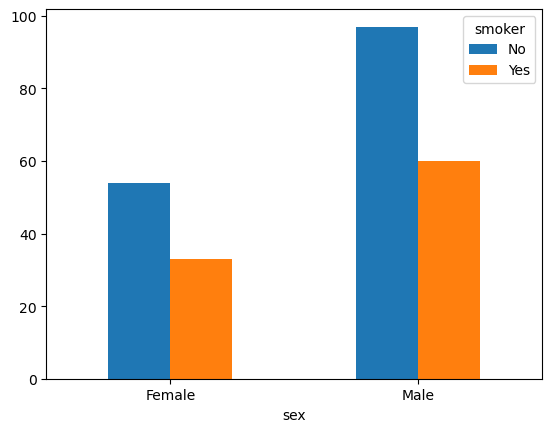

In [21]:
gender=df['sex']
smoking_habit=df['smoker']
df.groupby('sex')['smoker'].value_counts()
crosstb=pd.crosstab(gender,smoking_habit)
barplot = crosstb.plot.bar(rot=0)

In [ ]:
#Or we can do it below way as well doing a crosstab bar plot between smoker and sex

<AxesSubplot:xlabel='smoker'>

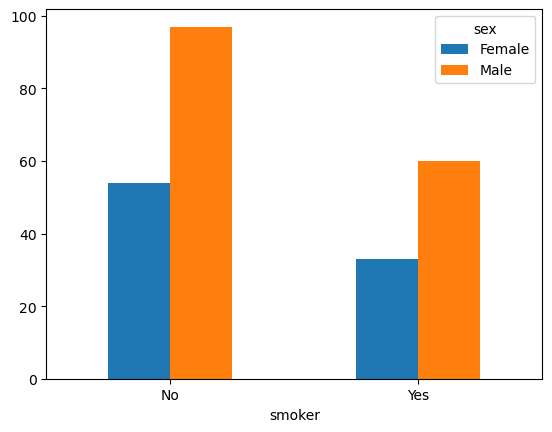

In [22]:
df.groupby('sex')['smoker'].value_counts()
pd.crosstab(df['smoker'],df['sex']).plot(kind ='bar',rot=0)

### 11. Compute the average tip amount given for different days and display it in the plot.

Text(0, 0.5, 'Average tip')

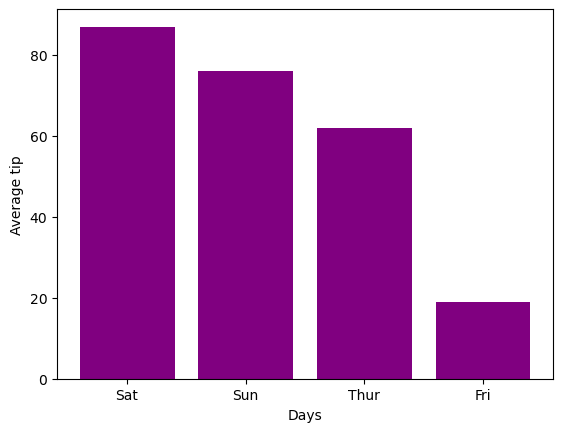

In [23]:
average=df.day.value_counts()
plt.bar(average.index, average.values, color='purple')
plt.xlabel('Days')
plt.ylabel('Average tip')

<AxesSubplot:xlabel='day'>

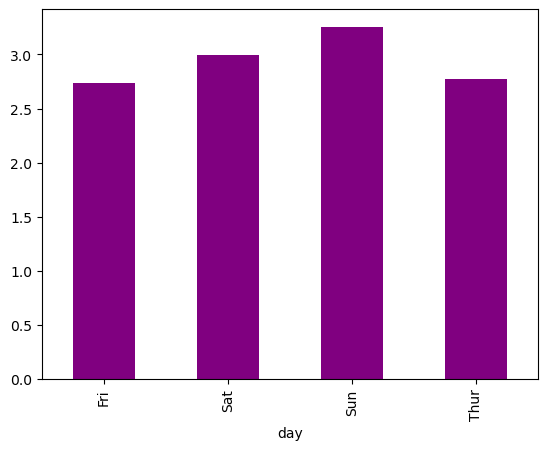

In [24]:
 df.groupby('day')['tip'].mean().plot(kind='bar',color='purple')

<AxesSubplot:xlabel='day', ylabel='tip'>

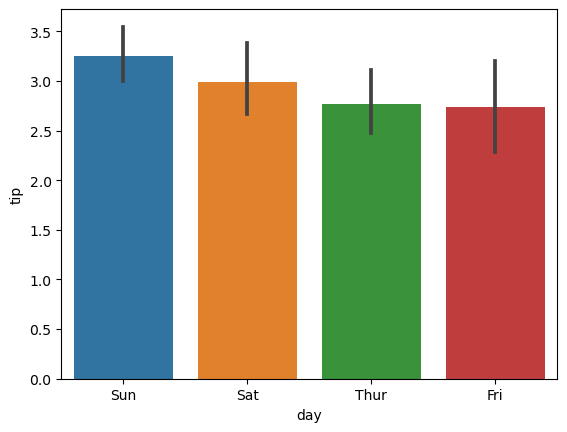

In [25]:
sns.barplot(x='day',y='tip',data = df)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<AxesSubplot:xlabel='size'>

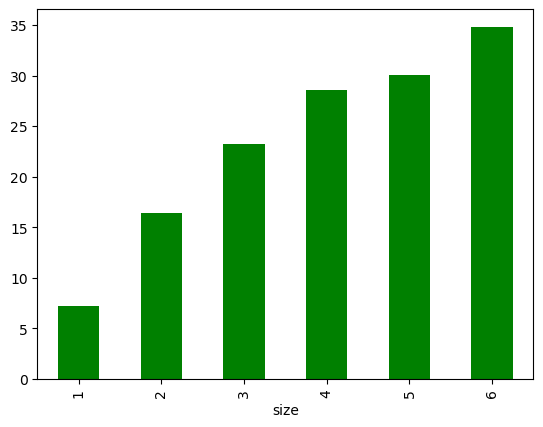

In [26]:
df.groupby('size')['total_bill'].mean().plot(kind='bar',color='green')

In [ ]:
#With increase in group size, total bill increases

In [ ]:
#We can also visualize using heatmap 

<AxesSubplot:>

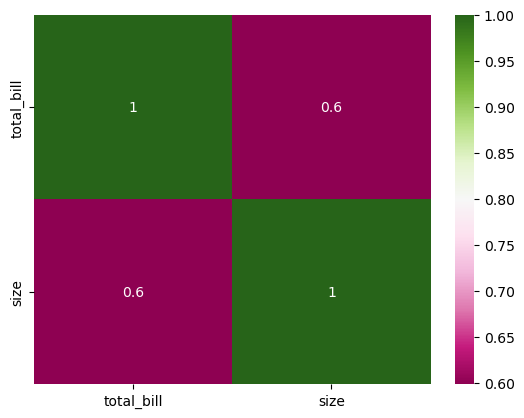

In [27]:
sns.heatmap(df[['total_bill', 'size']].corr(), annot=True, cmap='PiYG')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

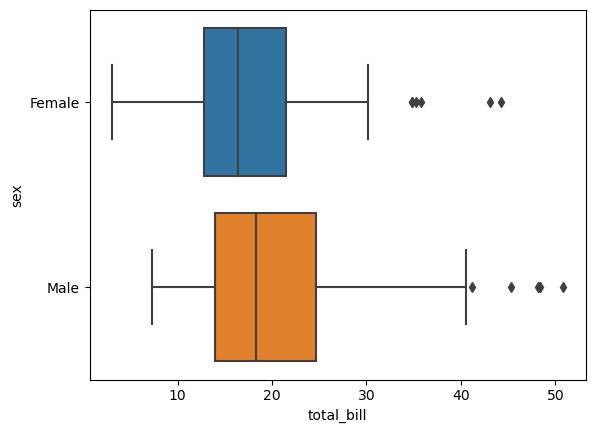

In [28]:
sns.boxplot(x='total_bill',y='sex',data = df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [29]:
df_data=df.groupby(['time','day'],as_index=False)['total_bill'].max()
df_data[(df_data['day']=='Sat')|(df_data['day']=='Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


In [ ]:
#This shows that we do not have lunch bill amount for Saturday or Sunday. We can also derive as below:

On Saturday, max dinner bill is 50.81
On Sunday, max dinner bill is 48.17


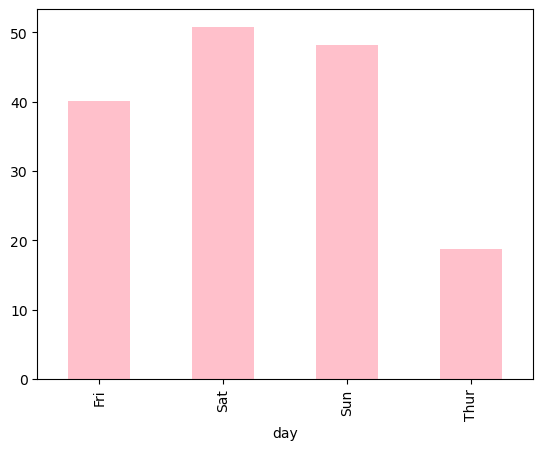

In [30]:
dinner_highest_sat =df.groupby(['time','day'])['total_bill'].max().loc['Dinner']['Sat']
dinner_highest_sun =df.groupby(['time','day'])['total_bill'].max().loc['Dinner']['Sun']
df.groupby(['time','day'])['total_bill'].max().loc['Dinner'].plot.bar(color='pink')
print("On Saturday, max dinner bill is " + str(dinner_highest_sat) )
print("On Sunday, max dinner bill is " + str(dinner_highest_sun) )

<AxesSubplot:xlabel='day'>

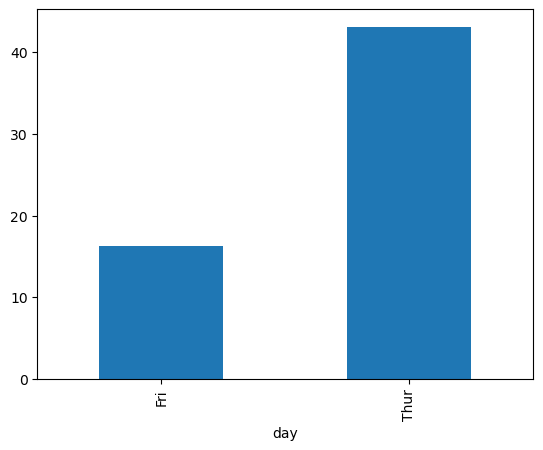

In [31]:
lunch_max = df.groupby(['time','day'])['total_bill'].max().loc['Lunch']
lunch_max.plot.bar()

In [ ]:
#We can see that we do not have Lunch for Saturday and Sunday. MAX LUNCH BILL FOR SATURDAY AND SUNDAY IS 0

### 15. Compute the percentage of missing values in the dataset.

In [32]:
df.isnull().sum()/len(df)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [33]:
len(df[df.duplicated()])

1

In [34]:
df.drop_duplicates(inplace=True)

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

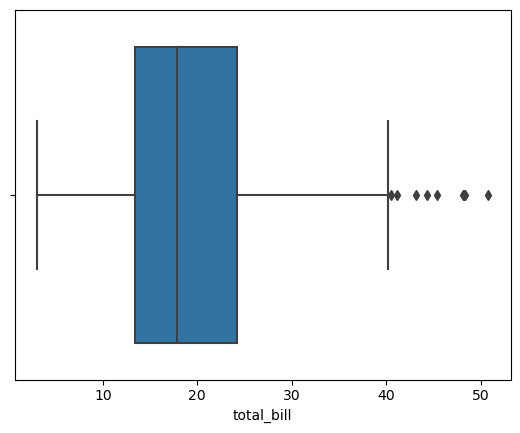

In [35]:
sns.boxplot(df['total_bill'])
plt.show()

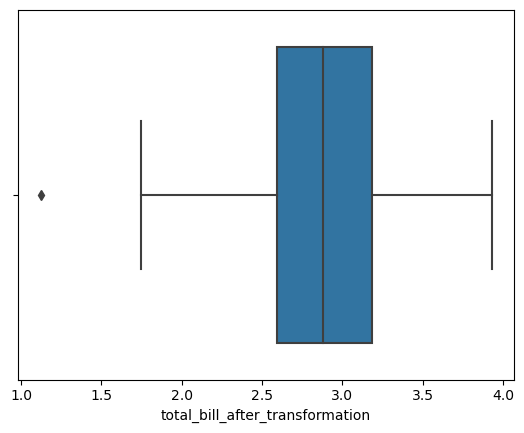

In [36]:
df['total_bill_after_transformation'] = np.log(df['total_bill'])

sns.boxplot(df['total_bill_after_transformation'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

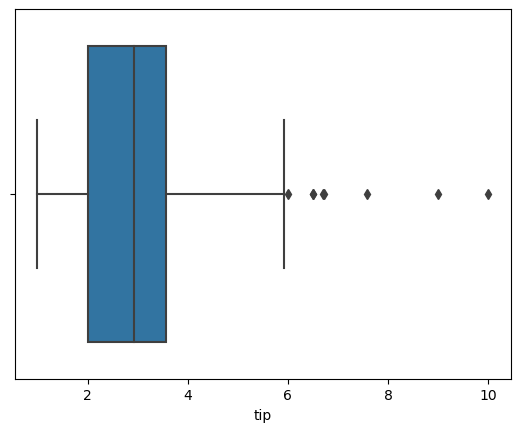

In [37]:
sns.boxplot(df['tip'])
plt.show()

In [38]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

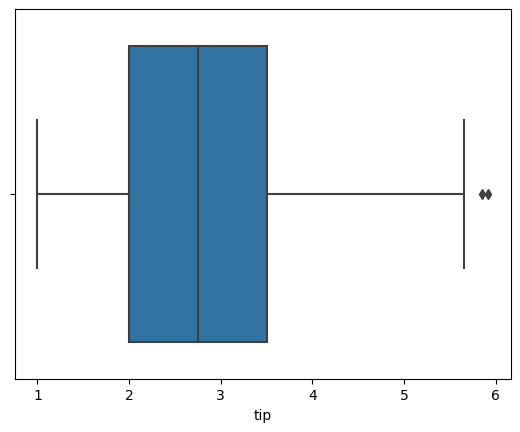

In [39]:
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [40]:
df = pd.get_dummies(df,drop_first = True)
df.sample(5)

,total_bill,tip,size,total_bill_after_transformation,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0,0,0,1,0,0
45,18.29,3.00,2,2.906354,1,0,0,1,0,0
68,20.23,2.01,2,3.007167,1,0,1,0,0,0
125,29.80,4.20,6,3.394508,0,0,0,0,1,1
13,18.43,3.00,4,2.913980,1,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [41]:
total_bill_max = df['total_bill'].max()
print('total bill maximum is', total_bill_max)
total_bill_min = df['total_bill'].min()
print('total bill minimum is', total_bill_min)
range_before = total_bill_max-total_bill_min
print('Range before MinMaxScaler transformation is : ',range_before)

total bill maximum is 50.81
total bill minimum is 3.07
Range before MinMaxScaler transformation is :  47.74


In [42]:
minmaxscalar = MinMaxScaler()
df['total_bill_mm'] = minmaxscalar.fit_transform(df[['total_bill']])

In [43]:

totalbill_mm_max = df['total_bill_mm'].max()
totalbill_mm_min = df['total_bill_mm'].min()
range_ = totalbill_mm_max-totalbill_mm_min
range_after=totalbill_mm_max-totalbill_mm_min
print('Range after MinMaxScaler transformation is: ', range_after)

Range after MinMaxScaler transformation is:  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [44]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
# i) Encode the categorical variables.
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [46]:
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variableX = tips_df.drop('tip',axis=1)
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

In [47]:
#We can also do this below way:
X = tips_df[['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']]
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [48]:
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

## Scaling the data using min max scaling
mm=MinMaxScaler()

X_train['total_bill'] = mm.fit_transform(X_train[['total_bill']])
X_train['size']=mm.fit_transform(X_train[['size']])
X_test['total_bill'] = mm.fit_transform(X_test[['total_bill']])
X_test['size']=mm.fit_transform(X_test[['size']])

(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [49]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)


LinearRegression()

In [50]:
prediction = linearRegression.predict(X_test)

In [51]:
print('r_squared value is:', r2_score(y_test,prediction))

r_squared value is: 0.4093770189540388


### Happy Learning:)